# Task 3 - Identify Feature Values

## Response Visualizations

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator as ML
from matplotlib.ticker import ScalarFormatter as SF
from matplotlib.ticker import NullLocator as NL
import numpy as np

### Techniques
- Method 0: Animation
- Method 1: MotionRugs
- Method 2: Small Multiples
- Method 3: Streamlines

In [2]:
# techniques
techniques = {
    "motionRugs": {"id": 1, "name": "MotionRugs", "color":"forestgreen"},
    "animation": {"id": 0, "name": "Animation", "color":"teal"},
    "small_multiples": {"id": 2, "name": "Small Multiples", "color":"mediumpurple"},
    "streamlines": {"id": 3, "name": "Streamlines", "color":"steelblue"},
    }

### Task data

In [3]:
# task 3 study data:
data_t3 = {
    "animation": [
         {"user": 7,  "slowest": 2688, "fastest": 1905 } # user 7
        ,{"user": 9,  "slowest": 2487, "fastest": 1866 } # user 9
        ,{"user": 13, "slowest": 2520, "fastest": 1893} # user 13
        ,{"user": 16, "slowest": 2496, "fastest": 1848} # user 16
        ,{"user": 22, "slowest": 2421, "fastest": 1896 } # user 22
	],
    "motionRugs": [
         {"user": 5,  "slowest": 2510, "fastest": 951 } # user 5
        ,{"user": 8,  "slowest": 2530, "fastest": 1890 } # user 8
        ,{"user": 12, "slowest": 2535, "fastest": 1846 } # user 12
        ,{"user": 17, "slowest": 2471, "fastest": 1893 } # user 17
        ,{"user": 20, "slowest": 2488, "fastest": 1877 } # user 20
	],
    "small_multiples":[
         {"user": 6,  "slowest": 2376, "fastest": 1836 } # user 6
        ,{"user": 10, "slowest": 2376, "fastest": 972  } # user 10
        ,{"user": 14, "slowest": 2376, "fastest": 1836 } # user 14
        ,{"user": 18, "slowest": 2484, "fastest": 1836 } # user 18
        ,{"user": 21, "slowest": 2376, "fastest": 1836 } # user 21
	],
    "streamlines":[
         {"user": 4,  "slowest": 2376, "fastest": 1836 } # user 4
        ,{"user": 11, "slowest": 2484, "fastest": 1836 } # user 11
        ,{"user": 15, "slowest": 2484, "fastest": 1836 } # user 15
        ,{"user": 19, "slowest": 2484, "fastest": 1836 } # user 19
        ,{"user": 23, "slowest": 2376, "fastest": 1836 } # user 23
    ]
}

### Response Chart

In [4]:
def plot_task_3(data_, techniques, chart_title, output_name):

    fig_grid, axs = plt.subplots(4, 1) # chart per technique
    img = np.flipud(plt.imread(fname="imgs/motionrugevalversion.png")) # add MotionRug as background image to chart for reference
    y = [20,50,80,110,140]
    radius = 5

    fig_grid.set_size_inches(28.125, 9) # 2700 px x 151 px for 600dpi
    fig_grid.set_dpi(600)
    fig_grid.tight_layout(pad=4)
    multiple_locator = ML(50)
    minor_formatter = SF()
    null_locator = NL()
    for idx, technique in enumerate(techniques): # for each technique

        ax = axs[idx]
        data = data_.get(technique)
        color = techniques.get(technique)["color"]    
        sub_label = techniques.get(technique)["name"]
                
        
        # chart setup
        ax.imshow(img, alpha=.5, origin="lower") # show MotionRug in background
        ax.set_xlim(0,2700)
        ax.set_ylim(0,151)
        ax.xaxis.set_minor_locator(multiple_locator)
        ax.xaxis.set_minor_formatter(minor_formatter)
        ax.tick_params(axis="x", which="minor", rotation=90, labelsize = 10)
        ax.tick_params(axis="x", which="major", rotation=90, labelsize = 14)
        ax.yaxis.set_major_locator(null_locator)
        ax.set_ylabel(sub_label, fontsize = 18)

        # iterate over each y position to draw user input
        for i in range(len(y)):    
            y_ = y[i]    
            ax.axhline(y=y_-radius, xmin=.001, xmax=1.011, clip_on=False, color="grey").set_dashes((2,2))
            ax.text(2730, y_- 2* radius, f"user-" + str(data[i]["user"]))
            # fastest
            ax.scatter(data[i]["fastest"], y_ - radius, marker="^", color = "red",  s= 100)
            # slowest
            ax.scatter(data[i]["slowest"], y_ - radius, marker="v", color = "blue", s= 100)
               
    plt.suptitle(chart_title, fontsize=20, fontweight= "bold")
    plt.savefig(f"imgs/output/pdf/{output_name}.pdf", dpi=600)
    plt.savefig(f"imgs/output/png/{output_name}.png", dpi=600)
    plt.show()
    
chart_title = "Task 3 - Identify Feature Values"
output_name = "task3_techniques"

plot_task_3(data_t3, techniques, chart_title, output_name)

## Statistics

### Calculations

In [1]:
import numpy as np
import math
import pandas as pd

# returns window of overall max distance traveled within window
def get_window_of_max_speed(df,window_size):

    #reorder to frame-id matrix and fill with according acceleration
    ldf = df.pivot_table(index='t',columns='a',values=['x','y'])
    top = len(ldf) - window_size + 1
    windows_dict = {}
    for i in range(top): # iterate over frames from 0 to last start of window
        win_id = "window_"+ str(i)
        dist_per_window = 0 
        for j in range(len(ldf.iloc[i])//2):
            win_acc_per_fish = win_id + '_' + str(j) 

            dist_per_window_per_fish = 0
            for n in range(0, window_size-1):
                departure_point = (ldf.iloc[i+n]['x'][j], ldf.iloc[i+n]['y'][j]) # go from here
                arrival_point = (ldf.iloc[i+n+1]['x'][j], ldf.iloc[i+n+1]['y'][j]) # to here
                dist_per_window_per_fish = dist_per_window_per_fish + math.hypot(arrival_point[0] - departure_point[0], arrival_point[1] - departure_point[1]) 

            dist_per_window = dist_per_window + dist_per_window_per_fish
        windows_dict[win_id] = dist_per_window
    windows_dict.pop('window_0')
    max_speed_window = max(windows_dict, key=windows_dict.get)
    min_speed_window = min(windows_dict, key=windows_dict.get)
    return [min_speed_window, max_speed_window]

extremes_speed_window = get_window_of_max_speed(pd.read_csv('fishdataEVAL.csv'),3)
print( "The window with the lowest speed is " +  extremes_speed_window[0])
print( "The window with the highest speed is " +  extremes_speed_window[1])

The window with the lowest speed is window_2500
The window with the highest speed is window_1878


### Response and Completion Calculations

[0     75
1    201
2    140
3    118
4    215
Name: duration_seconds, dtype: int64, 0    30
1    67
2    33
3    31
4    42
Name: duration_seconds, dtype: int64, 0    54
1    36
2    41
3    56
4    43
Name: duration_seconds, dtype: int64, 0    50
1    27
2    33
3    30
4    27
Name: duration_seconds, dtype: int64]
Technique: animation
Total Duration: 749
Duration Mean: 149.8
Duration Median: 140.0
Duration Minimum: 75
Duration Maximum: 215
Duration Variance: 3393.7

Technique: motionrugs
Total Duration: 203
Duration Mean: 40.6
Duration Median: 33.0
Duration Minimum: 30
Duration Maximum: 67
Duration Variance: 240.3

Technique: small_multiples
Total Duration: 230
Duration Mean: 46.0
Duration Median: 43.0
Duration Minimum: 36
Duration Maximum: 56
Duration Variance: 74.5

Technique: streamlines
Total Duration: 167
Duration Mean: 33.4
Duration Median: 30.0
Duration Minimum: 27
Duration Maximum: 50
Duration Variance: 92.30000000000001

animation
Total #answers 10
Mean #answers 2.0
Median #

C:\Users\Raphael\AppData\Local\Temp\ipykernel_32760\2678247118.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Animation", "MotionRugs","Small Multiples", "Streamlines"])


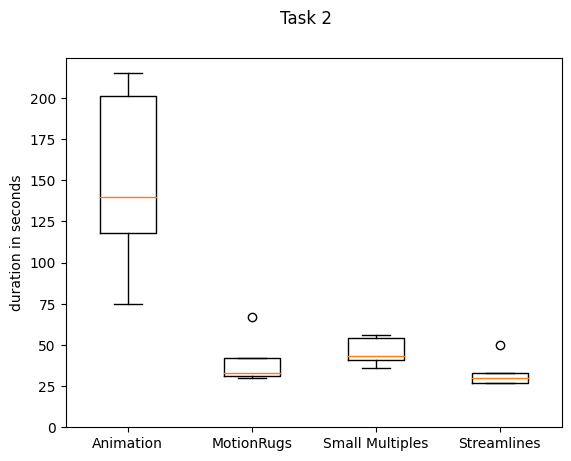

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
import ast
import statistics

# Create your connection.
cnx = sqlite3.connect('motionrugs.db')

qu_start = "SELECT id, Cast ((JulianDay(end_time) - JulianDay(start_time)) * 24 * 60 * 60 As Integer) as duration_seconds FROM tracking where task_id in (SELECT id from tasks WHERE group_id = "
qu_end = " AND task_type = 2)"

duration_data = []
for i in range(4):
    qu = qu_start + str(i) + qu_end
    duration_frame = pd.read_sql_query(qu, cnx)
    duration_data.append(duration_frame["duration_seconds"])
cnx.commit()
cnx.close()


techniques = ["animation", "motionrugs", "small_multiples", "streamlines"]
    
print(duration_data)
# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.set_ylabel('duration in seconds')
ax.set_xticklabels(["Animation", "MotionRugs","Small Multiples", "Streamlines"])
fig.suptitle('Task 3')
ax.boxplot(duration_data)
plt.ylim(ymin=0)
#plt.show()

# Process each series in the dataset
for i, series in enumerate(duration_data):
    print(f"Technique: {techniques[i]}")
    print("Total Duration:", series.sum())
    print("Duration Mean:", series.mean())
    print("Duration Median:", series.median())
    print("Duration Minimum:", series.min())
    print("Duration Maximum:", series.max())
    print("Duration Variance:", series.var())
    print()




# user duration
cnx = sqlite3.connect('motionrugs.db')

qu_start = "SELECT * FROM tracking where task_id in (SELECT id from tasks WHERE group_id = "
qu_end = " AND task_type = 2)"


tracking_data = {}
for i in range(4):
    qu = qu_start + str(i) + qu_end
    tracking_frame = pd.read_sql_query(qu, cnx)
    tracking_data[techniques[i]] = tracking_frame
cnx.commit()
cnx.close()



#user actions

for t in techniques:
    print(t)
    ev = {}
    task_d = tracking_data[t]["task_data"]
    
    # Convert the string representations of nested lists to actual lists
    a = task_d.apply(ast.literal_eval)

    # Collect the count of items in each sublist
    item_counts = [len(sublist) for sublist in a]

    # Calculate the mean
    mean_items = sum(item_counts) / len(item_counts)

    # Calculate the median
    median_items = statistics.median(item_counts)

    # Calculate the maximum and minimum
    max_items = max(item_counts)
    min_items = min(item_counts)

    # Calculate the variance
    variance_items = statistics.variance(item_counts)

    # Calculate the total number of items
    total_items = sum(item_counts)

    print("Total #answers", total_items)
    print("Mean #answers", mean_items)
    print("Median #answers", median_items)
    print("Maximum #answers", max_items)
    print("Minimum #answers", min_items)
    print("Variance #answers", variance_items)

    print("-------------")


### Error Calculations

In [3]:
def translate_small_multi(s):
    row = int(s[0])
    col = int(s[2]) +1
    mul = 0
    return 66*(8*row + col)
# # task 0 data:
# data_t0 = {
#     "animation": [
#          {"user": 7,  "values": [411, 765, 1359, 1734, 2016]} # user 7
#         ,{"user": 9,  "values": [393, 786, 1308, 1677, 2064]} # user 9
#         ,{"user": 13, "values": [1185, 1527, 1623, 1971, 2301]} # user 13
#         ,{"user": 16, "values": [324, 639, 1161, 1566, 1887]} # user 16
#         ,{"user": 22, "values": [351, 651, 1215, 1542, 1908, 147]} # user 22

#         ],
#     "motionRugs": [
#          {"user": 5,  "values": [1662, 141, 742]} # user 5
#         ,{"user": 8,  "values": [145, 722, 1692]} # user 8
#         ,{"user": 12, "values": [149, 724, 1736]}# user 12 
#         ,{"user": 17, "values": [147, 758, 1750]} # user 17
#         ,{"user": 20, "values": [694, 1553, 63]} # user 20
#     ],
#     "small_multiples":[
#          {"user": 6,  "values": [432, 756, 1296, 1620, 1944]} # user 6
#         ,{"user": 10,  "values": [216, 540, 864, 1296, 1728, 2052, 2484]} # user 10
#         ,{"user": 14,  "values": [108, 756, 1188, 1296, 1620, 1944, 2376, 2484, 2592]} # user 14
#         ,{"user": 18,  "values": [216, 756, 1296, 1620, 1944, 2376, 2592]} # user 18
#         ,{"user": 21,  "values": [216, 432, 648, 1296, 1620, 1944]} # user 21
#     ],
#     "streamlines":[
#          {"user": 4,   "values": [108, 324, 648, 1080, 1512, 1836]} # user 4
#         ,{"user": 11,  "values": [756, 1296]} # user 11
#         ,{"user": 15,  "values": [108, 324, 648, 1620]} # user 15
#         ,{"user": 19,  "values": [432, 756, 1296, 1620]} # user 19
#         ,{"user": 23,  "values": [216, 540, 756, 1296, 1512]} # user 23
#     ]
# }
import json    

cnx = sqlite3.connect('motionrugs.db')

qu_start = "SELECT * FROM tracking where task_id in (SELECT id from tasks WHERE group_id = "
qu_end = " AND task_type = 2)"

techniques = ["animation", "motionrugs", "small_multiples", "streamlines"]
tracking_data = {}
for i in range(4):
    qu = qu_start + str(i) + qu_end
    tracking_frame = pd.read_sql_query(qu, cnx)
    tracking_data[techniques[i]] = tracking_frame
cnx.commit()
cnx.close()


data_t2 = {}
for t in techniques:
    a = []
    if t == 'animation':
        for b in tracking_data[t]['task_data']:
            # convert the string to a dictionary
            b_dictionary = json.loads(b)
            v = {"values": [float(b_dictionary["fastest"][0]), float(b_dictionary["slowest"][0])]}
            a.append(v)
    if t == 'motionrugs':
        for b in tracking_data[t]['task_data']:
            b_dictionary = json.loads(b)
            v = {"values": [float(b_dictionary[0]), float(b_dictionary[1])]}
            a.append(v)
    if t == 'small_multiples':
        for b in tracking_data[t]['task_data']:
            b_dictionary = json.loads(b)
            v = {"values": [translate_small_multi(b_dictionary[0]), translate_small_multi(b_dictionary[1])]}
            a.append(v)
    if t == 'streamlines':
        for b in tracking_data[t]['task_data']:
            b_dictionary = json.loads(b)
            v = {"values": [translate_small_multi(b_dictionary[0]), translate_small_multi(b_dictionary[1])]}
            a.append(v)
            
    data_t2[t] = a
    

correct_values = {
    'slow': 2500,
    'fast': 1878
}
import numpy as np

# Iterate over each technique in the data dictionary
for technique in data_t2:
    # Extract all the values associated with the current technique and flatten the list
    values = [val for item in data_t2[technique] for val in item['values']]

    # Find the nearest frame in correct_values for each value
    nearest_frames = [correct_values['slow'] if i % 2 == 0 else correct_values['fast'] for i, val in enumerate(values)]
    
    # Calculate the absolute difference between the values and the nearest frames
    differences = np.abs(np.array(values) - np.array(nearest_frames))

    # Calculate the average difference
    average_difference = np.mean(differences)

    # Calculate the mean, median, minimum, maximum, and variance of the values
    mean_values = round(np.mean(differences), 2)
    median_values = round(np.median(differences), 2)
    min_values = round(np.min(differences), 2)
    max_values = round(np.max(differences), 2)
    var_values = round(np.var(differences), 2)

    # Print the technique and the calculated attributes
    print("Technique:", technique)
    print("Absolute Frame Error:", round(sum(differences), 2))
    print("Mean Frame Error:", mean_values)
    print("Median Frame Error:", median_values)
    print("Minimum Frame Error:", min_values)
    print("Maximum Frame Error:", max_values)
    print("Variance Frame Error:", var_values)
    print()

Technique: animation
Absolute Frame Error: 13945.24
Mean Frame Error: 1394.52
Median Frame Error: 1372.66
Minimum Frame Error: 1182.89
Maximum Frame Error: 1632.14
Variance Frame Error: 42117.25

Technique: motionrugs
Absolute Frame Error: 1103.5
Mean Frame Error: 110.35
Median Frame Error: 21.71
Minimum Frame Error: 0.66
Maximum Frame Error: 926.77
Variance Frame Error: 74176.87

Technique: small_multiples
Absolute Frame Error: 9482
Mean Frame Error: 948.2
Median Frame Error: 1015.0
Minimum Frame Error: 756
Maximum Frame Error: 1284
Variance Frame Error: 30150.76

Technique: streamlines
Absolute Frame Error: 8822
Mean Frame Error: 882.2
Median Frame Error: 869.0
Minimum Frame Error: 756
Maximum Frame Error: 1048
Variance Frame Error: 16449.16

